# K-Means Clusterning

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("E:\\Praxis\\College_ppt\\Market Research(PD)\\RFM Analysis\\purchases.txt", sep='\s+', header=None)

In [4]:
df.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [5]:
df.rename({0:'Customer-ID',1:'Amount',2:'Date'},axis=1,inplace=True)

In [6]:
df.head()

,Customer-ID,Amount,Date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [7]:
df.describe()

,Customer-ID,Amount
count,51243.000000,51243.000000
mean,108934.547938,62.337195
std,67650.610139,156.606801
min,10.000000,5.000000
25%,57720.000000,25.000000
50%,102440.000000,30.000000
75%,160525.000000,60.000000
max,264200.000000,4500.000000


In [8]:
df.Date.max()

'2015-12-31'

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
Customer-ID    51243 non-null int64
Amount         51243 non-null float64
Date           51243 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [11]:
df.head()

,Customer-ID,Amount,Date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [12]:
df.shape

(51243, 3)

In [13]:
df['year']=df.Date.transform(lambda x: x.year)

In [14]:
df.head()

,Customer-ID,Amount,Date,year
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
Customer-ID    51243 non-null int64
Amount         51243 non-null float64
Date           51243 non-null datetime64[ns]
year           51243 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [16]:
df.describe()

,Customer-ID,Amount,year
count,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699
std,67650.610139,156.606801,2.883072
min,10.000000,5.000000,2005.000000
25%,57720.000000,25.000000,2009.000000
50%,102440.000000,30.000000,2011.000000
75%,160525.000000,60.000000,2013.000000
max,264200.000000,4500.000000,2015.000000


## EDA

In [17]:
df.year.value_counts()

2015    6197
2012    5960
2013    5912
2014    5739
2009    5054
2010    4939
2011    4785
2007    4674
2008    4331
2006    2182
2005    1470
Name: year, dtype: int64

Text(0.5, 1.0, 'YearWise Customer Count')

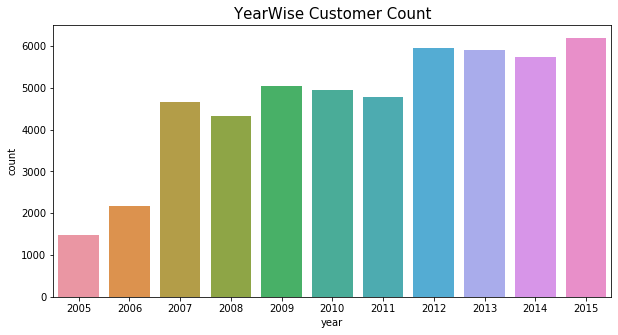

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['year'])
plt.title("YearWise Customer Count", fontdict={'fontsize':15})

In [ ]:
avg_amount = df.groupby('year').Amount.apply(lambda x: x.mean())

In [ ]:
avg_amount

year
2005    55.826122
2006    52.250454
2007    49.264014
2008    53.071780
2009    50.745253
2010    58.740012
2011    63.519300
2012    62.913312
2013    67.931357
2014    75.390347
2015    77.197697
Name: Amount, dtype: float64

Text(0.5, 1.0, 'YearWise Average Amount')

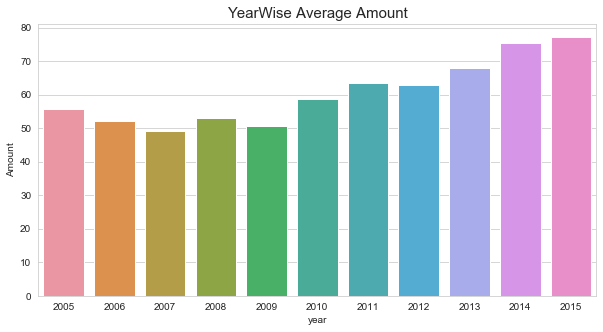

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_amount.index, y=avg_amount)
plt.title("YearWise Average Amount", fontdict={'fontsize':15})

## Bill Data to Customer Data

In [ ]:
time = pd.to_datetime('2016-01-01', format='%Y-%m-%d')
df['days_since']= df.Date.apply(lambda x:time-x)

In [ ]:
df.head()

,Customer-ID,Amount,Date,year,days_since
0,760,25.0,2009-11-06,2009,2247 days
1,860,50.0,2012-09-28,2012,1190 days
2,1200,100.0,2005-10-25,2005,3720 days
3,1420,50.0,2009-07-09,2009,2367 days
4,1940,70.0,2013-01-25,2013,1071 days


In [ ]:
df.describe()

,Customer-ID,Amount,year,days_since
count,51243.000000,51243.000000,51243.000000,51243
mean,108934.547938,62.337195,2010.869699,1631 days 22:32:36.278905
std,67650.610139,156.606801,2.883072,1061 days 01:50:43.241863
min,10.000000,5.000000,2005.000000,1 days 00:00:00
25%,57720.000000,25.000000,2009.000000,733 days 00:00:00
50%,102440.000000,30.000000,2011.000000,1500 days 00:00:00
75%,160525.000000,60.000000,2013.000000,2540 days 00:00:00
max,264200.000000,4500.000000,2015.000000,4016 days 00:00:00


In [ ]:
customer=pd.DataFrame()
customer['recency'] = df.groupby('Customer-ID').days_since.apply(lambda x:x.min())
customer['frequency'] = df.groupby('Customer-ID')['Customer-ID'].apply(lambda x:x.count())
customer['monetary'] = df.groupby('Customer-ID').Amount.apply(lambda x:x.mean())

In [ ]:
customer.reset_index(inplace=True)

In [ ]:
customer.head()

,Customer-ID,recency,frequency,monetary
0,10,3829 days,1,30.000000
1,80,343 days,7,71.428571
2,90,758 days,10,115.800000
3,120,1401 days,1,20.000000
4,130,2970 days,2,50.000000


In [ ]:
customer.describe()

,Customer-ID,recency,frequency,monetary
count,18417.000000,18417,18417.000000,18417.000000
mean,137573.510887,1253 days 00:54:34.539824,2.782375,57.792985
std,69504.599881,1081 days 10:30:31.826894,2.936888,154.360109
min,10.000000,1 days 00:00:00,1.000000,5.000000
25%,81990.000000,244 days 00:00:00,1.000000,21.666667
50%,136430.000000,1070 days 00:00:00,2.000000,30.000000
75%,195100.000000,2130 days 00:00:00,3.000000,50.000000
max,264200.000000,4014 days 00:00:00,45.000000,4500.000000


In [ ]:
customer['recency']=customer['recency'].astype('timedelta64[D]')

In [ ]:
customer.head()

,Customer-ID,recency,frequency,monetary
0,10,3829.0,1,30.000000
1,80,343.0,7,71.428571
2,90,758.0,10,115.800000
3,120,1401.0,1,20.000000
4,130,2970.0,2,50.000000


In [ ]:
customer.shape

(18417, 4)

Text(0.5, 1.0, 'Recency Distribution')

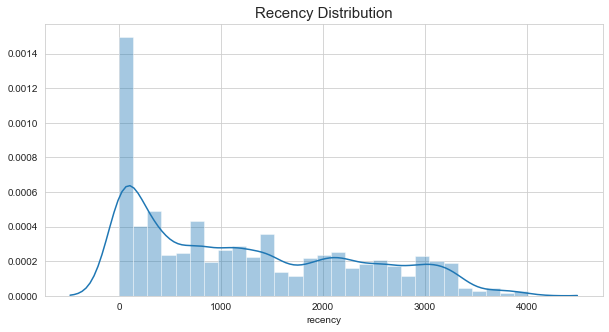

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer['recency'])
plt.title("Recency Distribution", fontdict={'fontsize':15})

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 4 columns):
Customer-ID    18417 non-null int64
recency        18417 non-null float64
frequency      18417 non-null int64
monetary       18417 non-null float64
dtypes: float64(2), int64(2)
memory usage: 575.7 KB


Text(0.5, 1.0, 'Frequency Distribution')

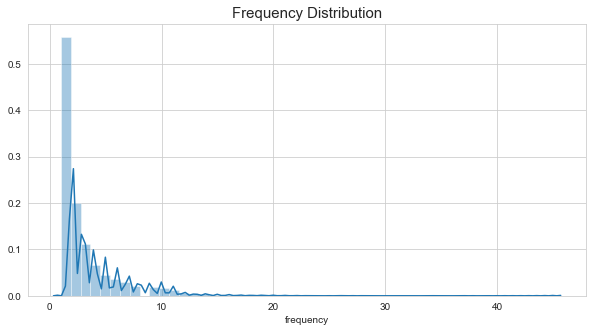

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer['frequency'])
plt.title("Frequency Distribution", fontdict={'fontsize':15})

Text(0.5, 1.0, 'Monetary Value Distribution')

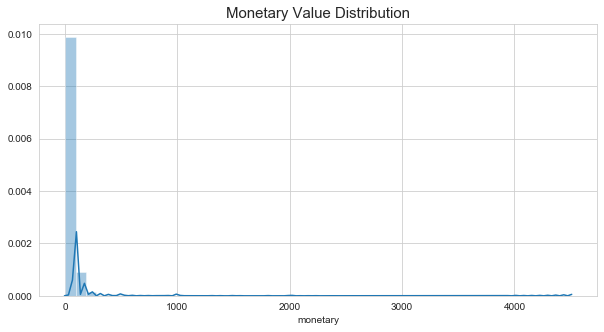

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer['monetary'])
plt.title("Monetary Value Distribution", fontdict={'fontsize':15})

In [ ]:
customer['monetary']=np.log(customer['monetary'])

Text(0.5, 1.0, 'Monetary Value Distribution-Normally Distributed')

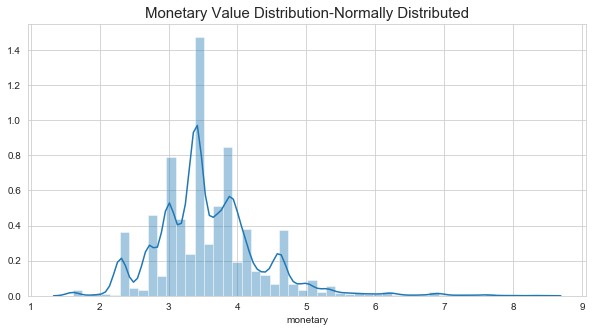

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer['monetary'])
plt.title("Monetary Value Distribution-Normally Distributed", fontdict={'fontsize':15})

In [ ]:
customer.head()

,Customer-ID,recency,frequency,monetary
0,10,3829.0,1,3.401197
1,80,343.0,7,4.268698
2,90,758.0,10,4.751865
3,120,1401.0,1,2.995732
4,130,2970.0,2,3.912023


In [ ]:
customer.drop(['Customer-ID'], axis=1, inplace=True)

In [ ]:
customer.head()

,recency,frequency,monetary
0,3829.0,1,3.401197
1,343.0,7,4.268698
2,758.0,10,4.751865
3,1401.0,1,2.995732
4,2970.0,2,3.912023


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_sc = sc.fit_transform(customer.values)

In [ ]:
pd.DataFrame(customer_sc)

,0,1,2
0,2.382043,-0.606909,-0.235802
1,-0.841530,1.436125,0.894386
2,-0.457771,2.457642,1.523861
3,0.136824,-0.606909,-0.764046
4,1.587709,-0.266403,0.429707
...,...,...,...
18412,-1.157784,-0.606909,-1.667085
18413,-1.033872,-0.606909,0.429707
18414,-1.127269,-0.606909,-0.764046
18415,-1.154086,-0.606909,0.529972


In [ ]:
customer_1=customer.copy()

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

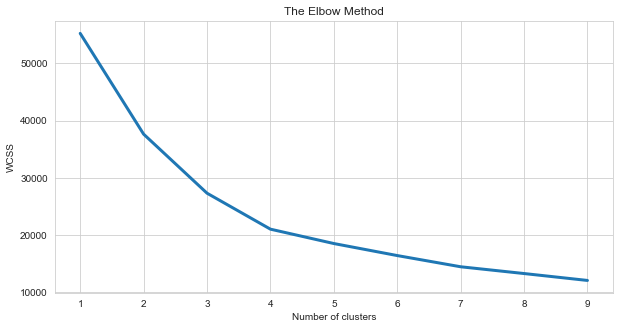

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(customer_sc)


    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.lineplot(x=range(1,10), y=wcss,lw= 3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
                 

## 6 Cluster Centers

In [ ]:
kmeans=KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(customer_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 1.1764366 , -0.38956895,  0.25016248],
       [-0.63767102, -0.20428795,  0.74306929],
       [-0.87251191,  2.19972141,  0.22477794],
       [-0.53772314, -0.25084289, -0.57078692],
       [-0.42044372,  0.11486291,  3.1906975 ],
       [ 1.20560373, -0.464325  , -1.0043526 ]])

In [ ]:
customer['clusters']= kmeans.labels_

In [ ]:
customer_sc

array([[ 2.38204349, -0.60690881, -0.23580188],
       [-0.84153018,  1.43612529,  0.89438649],
       [-0.45777141,  2.45764235,  1.52386076],
       ...,
       [-1.12726864, -0.60690881, -0.76404585],
       [-1.15408552, -0.60690881,  0.52997243],
       [-1.1577844 , -0.60690881,  3.42953758]])

Text(0.5, 1.0, 'Clusters')

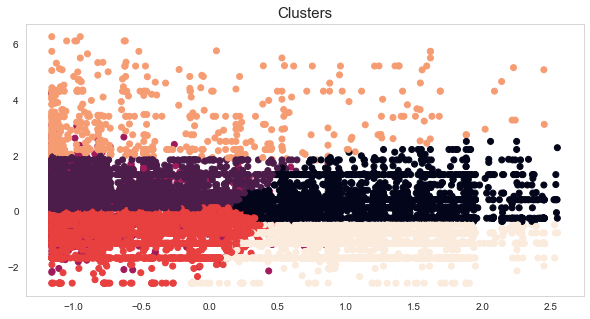

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(customer_sc[:,0], customer_sc[:,2] ,c =kmeans.labels_)
plt.grid(b=None)
plt.title("Clusters", fontdict={'fontsize':15})

In [ ]:
pd.crosstab(kmeans.labels_, kmeans.labels_)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,3455,0,0,0,0,0
1,0,3924,0,0,0,0
2,0,0,2177,0,0,0
3,0,0,0,5429,0,0
4,0,0,0,0,543,0
5,0,0,0,0,0,2889


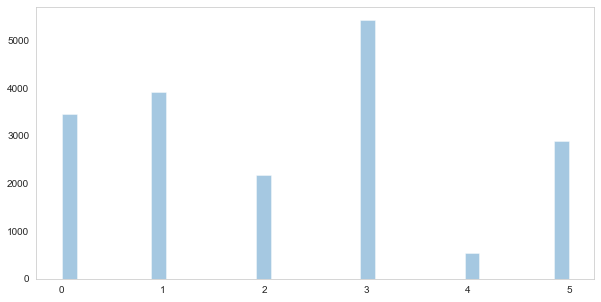

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(kmeans.labels_, kde=False)
plt.grid(b=None)

In [ ]:
customer.head()

,recency,frequency,monetary,clusters
0,3829.0,1,3.401197,0
1,343.0,7,4.268698,2
2,758.0,10,4.751865,2
3,1401.0,1,2.995732,3
4,2970.0,2,3.912023,0


In [ ]:
customer['monetary']= np.exp(customer['monetary'])

In [ ]:
customer.head()

,recency,frequency,monetary,clusters
0,3829.0,1,30.000000,0
1,343.0,7,71.428571,2
2,758.0,10,115.800000,2
3,1401.0,1,20.000000,3
4,2970.0,2,50.000000,0


In [ ]:
cluster = customer.groupby(['clusters']).mean().reset_index()

In [ ]:
cluster

,clusters,recency,frequency,monetary
0,0,2524.746744,1.638495,48.220271
1,1,562.937819,2.182722,68.315371
2,2,309.496096,9.242536,52.297284
3,3,671.983422,2.045496,24.640859
4,4,798.366483,3.119705,610.422630
5,5,2557.890966,1.418138,17.520580


In [ ]:
cluster['total_monetary']= cluster['frequency']*cluster['monetary']

In [ ]:
cluster

,clusters,recency,frequency,monetary,total_monetary
0,0,2524.746744,1.638495,48.220271,79.008670
1,1,562.937819,2.182722,68.315371,149.113443
2,2,309.496096,9.242536,52.297284,483.359506
3,3,671.983422,2.045496,24.640859,50.402789
4,4,798.366483,3.119705,610.422630,1904.338738
5,5,2557.890966,1.418138,17.520580,24.846596


## 5 Cluster Centers

In [ ]:
kmeans_5=KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_5.fit(customer_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans_5.cluster_centers_

array([[-0.54086611, -0.20855138,  0.72330751],
       [ 1.25209809, -0.43444259, -0.3747397 ],
       [-0.20297745,  0.04933851,  2.96378457],
       [-0.87736573,  2.1967698 ,  0.22450582],
       [-0.51737483, -0.25956096, -0.61183971]])

In [ ]:
customer_1['clusters']= kmeans_5.labels_

In [ ]:
customer_1.head()

,recency,frequency,monetary,clusters
0,3829.0,1,3.401197,1
1,343.0,7,4.268698,3
2,758.0,10,4.751865,3
3,1401.0,1,2.995732,4
4,2970.0,2,3.912023,1


Text(0.5, 1.0, 'Clusters')

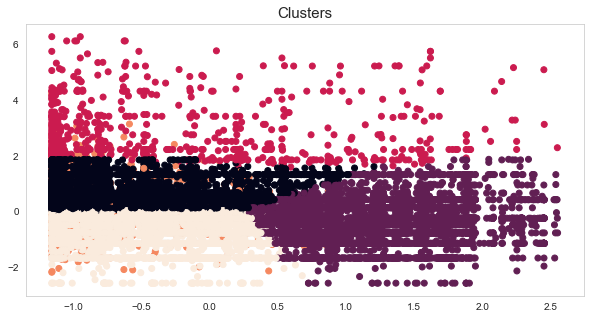

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(customer_sc[:,0], customer_sc[:,2] ,c =kmeans_5.labels_)
plt.grid(b=None)
plt.title("Clusters", fontdict={'fontsize':15})

In [ ]:
customer_1['monetary']= np.exp(customer_1['monetary'])

In [ ]:
customer_1.head()

,recency,frequency,monetary,clusters
0,3829.0,1,30.000000,1
1,343.0,7,71.428571,3
2,758.0,10,115.800000,3
3,1401.0,1,20.000000,4
4,2970.0,2,50.000000,1


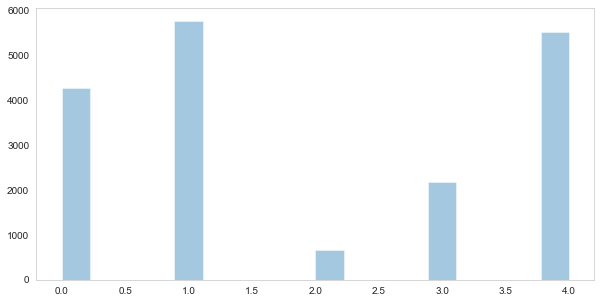

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(kmeans_5.labels_, kde=False)
plt.grid(b=None)

In [ ]:
cluster_5 = customer_1.groupby(['clusters']).mean().reset_index()

In [ ]:
cluster_5

,clusters,recency,frequency,monetary
0,0,668.140687,2.169900,67.023549
1,1,2607.067429,1.506500,31.266133
2,2,1033.536364,2.927273,529.979909
3,3,304.247140,9.233867,52.457730
4,4,693.544352,2.020094,24.040268


In [ ]:
cluster_5['total_monetary']= cluster_5['frequency']*cluster_5['monetary']

In [ ]:
cluster_5

,clusters,recency,frequency,monetary,total_monetary
0,0,668.140687,2.169900,67.023549,145.434365
1,1,2607.067429,1.506500,31.266133,47.102438
2,2,1033.536364,2.927273,529.979909,1551.395733
3,3,304.247140,9.233867,52.457730,484.387712
4,4,693.544352,2.020094,24.040268,48.563604


## Comparison between 5 cluster and 6 cluster 

In [ ]:
print(cluster , '\n')
print("---------------------------------------------------------------", '\n')
print(cluster_5)

   clusters      recency  frequency    monetary  total_monetary
0         0  2524.746744   1.638495   48.220271       79.008670
1         1   562.937819   2.182722   68.315371      149.113443
2         2   309.496096   9.242536   52.297284      483.359506
3         3   671.983422   2.045496   24.640859       50.402789
4         4   798.366483   3.119705  610.422630     1904.338738
5         5  2557.890966   1.418138   17.520580       24.846596 

--------------------------------------------------------------- 

   clusters      recency  frequency    monetary  total_monetary
0         0   668.140687   2.169900   67.023549      145.434365
1         1  2607.067429   1.506500   31.266133       47.102438
2         2  1033.536364   2.927273  529.979909     1551.395733
3         3   304.247140   9.233867   52.457730      484.387712
4         4   693.544352   2.020094   24.040268       48.563604


In [ ]:
print(pd.crosstab(kmeans.labels_, kmeans.labels_) , '\n')
print("---------------------------------------------------------------", '\n')
print(pd.crosstab(kmeans_5.labels_, kmeans_5.labels_))

col_0     0     1     2     3    4     5
row_0                                   
0      3455     0     0     0    0     0
1         0  3924     0     0    0     0
2         0     0  2177     0    0     0
3         0     0     0  5429    0     0
4         0     0     0     0  543     0
5         0     0     0     0    0  2889 

--------------------------------------------------------------- 

col_0     0     1    2     3     4
row_0                             
0      4279     0    0     0     0
1         0  5769    0     0     0
2         0     0  660     0     0
3         0     0    0  2185     0
4         0     0    0     0  5524


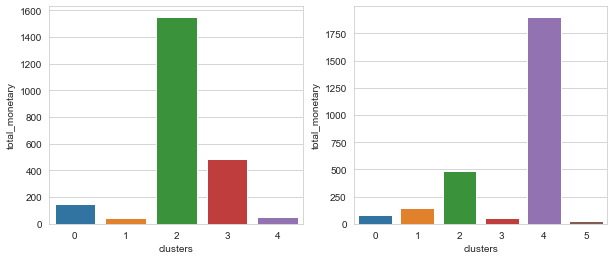

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='clusters', y ='total_monetary', data=cluster_5)

plt.subplot(1,2,2)
sns.barplot(x='clusters', y ='total_monetary', data=cluster)

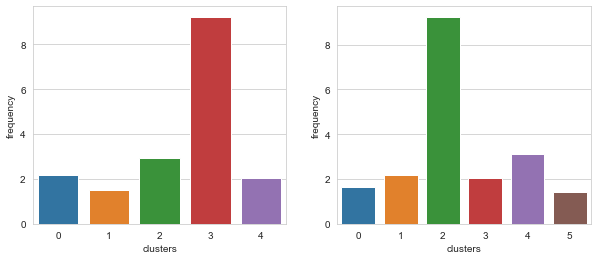

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='clusters', y ='frequency', data=cluster_5)

plt.subplot(1,2,2)
sns.barplot(x='clusters', y ='frequency', data=cluster)

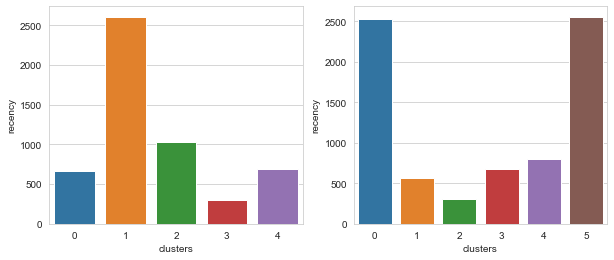

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='clusters', y ='recency', data=cluster_5)

plt.subplot(1,2,2)
sns.barplot(x='clusters', y ='recency', data=cluster)

In [ ]:
customer

,recency,frequency,monetary,clusters
0,3829.0,1,30.000000,0
1,343.0,7,71.428571,2
2,758.0,10,115.800000,2
3,1401.0,1,20.000000,3
4,2970.0,2,50.000000,0
...,...,...,...,...
18412,1.0,1,10.000000,3
18413,135.0,1,50.000000,1
18414,34.0,1,20.000000,3
18415,5.0,1,54.000000,1


## Comparison of clusters for selection

In [ ]:
cluster_4= customer[customer['clusters']==4]

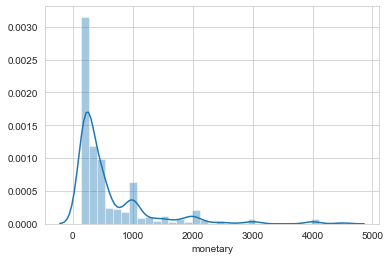

In [ ]:
sns.distplot(cluster_4['monetary'])

In [ ]:
cluster_4.monetary.describe()

count     543.000000
mean      610.422630
std       681.011382
min       142.857143
25%       200.000000
50%       340.000000
75%       740.000000
max      4500.000000
Name: monetary, dtype: float64

In [ ]:
cluster_4[cluster_4['monetary']<200].count()

recency      148
frequency    148
monetary     148
clusters     148
dtype: int64

In [ ]:
cluster_4[cluster_4['monetary']>900].count()

recency      120
frequency    120
monetary     120
clusters     120
dtype: int64

In [ ]:
cluster_2= customer[customer['clusters']==2]

In [ ]:
cluster_2.monetary.describe()

count    2177.000000
mean       52.297284
std        43.610842
min         6.750000
25%        29.375000
50%        40.000000
75%        60.000000
max       944.444444
Name: monetary, dtype: float64

In [ ]:
cluster_3= customer[customer['clusters']==3]

In [ ]:
cluster_3.monetary.describe()

count    5429.000000
mean       24.640859
std         7.490477
min         5.000000
25%        20.000000
50%        28.000000
75%        30.000000
max        40.000000
Name: monetary, dtype: float64

## Analysis

### we are selecting cluster_2 because of its high frequency value, good recency and overall good monetary average. 

### Maximum monetary value for cluster_2 is 944 whereas in case of cluster_4 the monetary value above 900 is 120(count).

### The monetary value of cluster 3 is very less, Max(40). with an customer segment around 5429. moreover on selecting the customer might result in less or no profit/gain (taking marketing cost into account)

### So we have selected cluster 2 and cluster 4 